<a href="https://colab.research.google.com/github/kdmwangi/CODSOFT/blob/main/Fraud_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Credit Card Fraud Detection

<li>Build a machine learning model to identify fraudulent credit card
transactions.
<li>Preprocess and normalize the transaction data, handle class
imbalance issues, and split the dataset into training and testing sets.
<li>Train a classification algorithm, such as logistic regression or random
forests, to classify transactions as fraudulent or genuine.
Evaluate the model's performance using metrics like precision, recall,
and F1-score, and consider techniques like oversampling or
undersampling for improving results.


The dataset contains transactions made by credit cards in September 2013 by European cardholders.
This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-sensitive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

Given the class imbalance ratio, we recommend measuring the accuracy using the Area Under the Precision-Recall Curve (AUPRC). Confusion matrix accuracy is not meaningful for unbalanced classification.

# Import Statements

In [59]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%pip install black

%matplotlib inline

!pip install black[jupyter] --quiet
from google.colab import drive
drive.mount("/content/drive")
...
# run many times


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 7.9 MB/s eta 0:00:00
Mounted at /content/drive


Ellipsis

In [ ]:
!black /content/drive/MyDrive/'Colab Notebooks'/'Fraud_Detection.ipynb'

# Read Data

In [2]:
dataset = pd.read_csv('creditcard.csv')


# Data Exploration

In [3]:
dataset.shape

(7973, 31)

In [4]:
dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [5]:
dataset.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
7968,10980,1.284388,-0.013181,0.646174,0.198985,-0.568675,-0.526121,-0.448235,-0.167709,1.773223,...,-0.101868,-0.030298,-0.081412,-0.123281,0.278808,1.064001,-0.090181,0.000481,15.95,0.0
7969,10981,1.190428,-0.122329,0.954945,0.267101,-0.971026,-0.652279,-0.612992,-0.003909,1.633117,...,-0.015001,0.127027,0.012079,0.534409,0.112179,1.004483,-0.100188,-0.004774,14.95,0.0
7970,10981,-0.725175,0.298202,1.824761,-2.587170,0.283605,-0.016617,0.153659,0.045084,-0.197611,...,-0.017097,-0.070535,-0.442861,-0.895837,0.624743,-0.510601,-0.031142,0.025564,12.95,0.0
7971,10981,1.226153,-0.129645,0.735197,0.142752,-0.703245,-0.349641,-0.612641,0.020507,1.648986,...,-0.047936,0.040196,-0.057391,-0.012386,0.187685,1.037786,-0.100081,-0.009869,15.95,0.0
7972,10981,1.145381,-0.059349,0.968088,0.267891,-0.822582,-0.597727,-0.450197,-0.119747,1.338188,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
dataset.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [7]:
dataset.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,7973.000000,7973.000000,7973.000000,7973.000000,7973.000000,7973.000000,7973.000000,7973.000000,7973.000000,7973.000000,...,7972.000000,7972.000000,7972.000000,7972.000000,7972.000000,7972.000000,7972.000000,7972.000000,7972.000000,7972.000000
mean,4257.151261,-0.299740,0.295226,0.899355,0.215736,-0.025285,0.157286,-0.026445,-0.070525,0.655244,...,-0.053715,-0.165799,-0.035174,0.025977,0.088893,0.020256,0.016150,0.001161,65.413540,0.003136
std,3198.964299,1.498341,1.283914,1.090297,1.447057,1.167218,1.325015,1.063709,1.332568,1.156618,...,0.953498,0.654858,0.488322,0.601760,0.427505,0.517409,0.403570,0.275976,194.911169,0.055915
min,0.000000,-23.066842,-25.640527,-12.389545,-4.657545,-32.092129,-7.574798,-12.968670,-23.632502,-3.878658,...,-11.468435,-8.527145,-15.144340,-2.512377,-2.577363,-1.338556,-7.976100,-3.054085,0.000000,0.000000
25%,1531.000000,-1.046362,-0.237359,0.372435,-0.687521,-0.630525,-0.655399,-0.517733,-0.199794,-0.085635,...,-0.271837,-0.581473,-0.182989,-0.340419,-0.161009,-0.363180,-0.063198,-0.019081,4.617500,0.000000
50%,3635.000000,-0.416341,0.335446,0.948695,0.223379,-0.107337,-0.148669,0.004732,0.016128,0.613170,...,-0.130344,-0.167048,-0.046107,0.089606,0.115418,-0.015260,0.007101,0.018443,15.950000,0.000000
75%,6662.000000,1.122758,0.950582,1.597949,1.131542,0.405082,0.555200,0.527353,0.307111,1.294087,...,0.044823,0.250886,0.086806,0.421015,0.361249,0.329322,0.144700,0.080563,54.910000,0.000000
max,10981.000000,1.685314,8.261750,4.101716,7.380245,11.974269,21.393069,34.303177,3.877662,10.392889,...,22.588989,4.534454,13.876221,3.200201,5.525093,3.517346,4.173387,4.860769,7712.430000,1.000000


In [8]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7973 entries, 0 to 7972
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    7973 non-null   int64  
 1   V1      7973 non-null   float64
 2   V2      7973 non-null   float64
 3   V3      7973 non-null   float64
 4   V4      7973 non-null   float64
 5   V5      7973 non-null   float64
 6   V6      7973 non-null   float64
 7   V7      7973 non-null   float64
 8   V8      7973 non-null   float64
 9   V9      7973 non-null   float64
 10  V10     7973 non-null   float64
 11  V11     7973 non-null   float64
 12  V12     7973 non-null   float64
 13  V13     7973 non-null   float64
 14  V14     7973 non-null   float64
 15  V15     7972 non-null   float64
 16  V16     7972 non-null   float64
 17  V17     7972 non-null   float64
 18  V18     7972 non-null   float64
 19  V19     7972 non-null   float64
 20  V20     7972 non-null   float64
 21  V21     7972 non-null   float64
 22  

In [9]:
dataset.dtypes

Time        int64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class     float64
dtype: object

In [10]:
# highest amount
print(f"{dataset['Amount'].max()} is the highest amount")
# least amount
print(f"{dataset['Amount'].min()} is the least amount")

7712.43 is the highest amount
0.0 is the least amount


In [11]:
dataset[-20:]

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
7953,10975,-0.195295,0.521268,1.434256,-0.652101,0.106763,0.258666,0.009089,0.167264,1.175229,...,-0.033815,0.041159,-0.269260,-0.849304,-0.136201,1.050313,-0.078328,-0.014294,14.95,0.0
7954,10976,1.189153,-0.060635,0.972446,0.259210,-0.892080,-0.630609,-0.550899,-0.055052,1.497383,...,-0.004098,0.199852,0.000447,0.558983,0.142117,1.001375,-0.094522,-0.002677,15.95,0.0
7955,10977,1.285888,-0.054289,0.413775,-0.066309,-0.176334,0.159908,-0.539002,-0.002637,1.502053,...,-0.087286,-0.003036,-0.176694,-0.810982,0.344627,1.085001,-0.092363,-0.015434,15.95,0.0
7956,10977,1.226333,-0.099813,0.742618,0.137696,-0.663756,-0.334571,-0.585634,-0.001422,1.585999,...,-0.043009,0.073736,-0.061124,0.017182,0.201393,1.035493,-0.097472,-0.008807,15.95,0.0
7957,10977,-1.706795,1.525315,0.857864,-0.036106,-1.210956,-0.222397,-1.025342,1.271377,0.422887,...,0.202229,0.285122,-0.122758,0.029863,-0.221374,1.093670,-0.637358,-0.130442,14.95,0.0
7958,10978,1.314172,-0.393035,0.401164,-0.478993,-0.839719,-0.440242,-0.910447,-0.077730,0.399755,...,0.164113,0.597952,-0.181490,-0.082715,0.470708,-0.124088,0.001663,0.027870,39.00,0.0
7959,10978,1.203169,-0.114123,0.872416,0.217274,-0.850822,-0.528506,-0.600233,-0.004233,1.611785,...,-0.025252,0.107685,-0.017058,0.334611,0.147187,1.016364,-0.099122,-0.006187,15.95,0.0
7960,10978,1.285853,-0.084448,0.401697,-0.064640,-0.207862,0.158500,-0.568156,0.022719,1.564522,...,-0.092221,-0.038169,-0.171197,-0.809587,0.331126,1.085820,-0.095161,-0.016203,15.95,0.0
7961,10979,1.270792,-0.466152,0.365816,-0.525627,-0.683161,0.022055,-1.011399,0.080285,0.447692,...,0.187797,0.684360,-0.147915,-0.403501,0.386381,-0.093228,0.015917,0.023723,39.00,0.0
7962,10979,-2.058928,0.527799,1.576619,-0.119223,0.362195,-0.398901,0.087637,-0.476905,2.126294,...,-0.431854,0.010496,-0.160385,0.244118,-0.784769,0.868540,-0.157976,0.191359,25.95,0.0


In [12]:
# data shows that fraud data are 103 and correct data are 35638
dataset.value_counts(subset='Class')

Class
0.0    7947
1.0      25
dtype: int64

In [13]:
# total sum transacted in that day
print(f'{dataset["Amount"].sum():.0f} is the total amount transacted ')

521477 is the total amount transacted 


In [14]:
# fraud transaction total amount
dataset.groupby('Class').sum()['Amount']

Class
0.0    518819.03
1.0      2657.71
Name: Amount, dtype: float64

In [15]:
# total time elapsed after all transaction
# average time for every transaction from the first transaction
print(f"{(dataset['Time'].mean()//60)//60:.0f} hours {dataset['Time'].mean()//60%60:.0f} minutes")

1 hours 10 minutes


In [16]:
# average amount transacted on both Class
dataset.groupby('Class').agg(['mean'])['Amount']

,mean
Class,
0.0,65.284891
1.0,106.308400


In [17]:
# find if there is amount that is more frequent
dataset['Amount'].mode()

0    1.0
Name: Amount, dtype: float64

# Data Cleaning

In [18]:
dataset.isna().any()

Time      False
V1        False
V2        False
V3        False
V4        False
V5        False
V6        False
V7        False
V8        False
V9        False
V10       False
V11       False
V12       False
V13       False
V14       False
V15        True
V16        True
V17        True
V18        True
V19        True
V20        True
V21        True
V22        True
V23        True
V24        True
V25        True
V26        True
V27        True
V28        True
Amount     True
Class      True
dtype: bool

In [19]:
dataset.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       1
V16       1
V17       1
V18       1
V19       1
V20       1
V21       1
V22       1
V23       1
V24       1
V25       1
V26       1
V27       1
V28       1
Amount    1
Class     1
dtype: int64

In [20]:
dataset[dataset['V23'].isna() == True]

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
7972,10981,1.145381,-0.059349,0.968088,0.267891,-0.822582,-0.597727,-0.450197,-0.119747,1.338188,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
dataset = dataset.dropna().reset_index(drop=True)

In [22]:
dataset.isna().any()

Time      False
V1        False
V2        False
V3        False
V4        False
V5        False
V6        False
V7        False
V8        False
V9        False
V10       False
V11       False
V12       False
V13       False
V14       False
V15       False
V16       False
V17       False
V18       False
V19       False
V20       False
V21       False
V22       False
V23       False
V24       False
V25       False
V26       False
V27       False
V28       False
Amount    False
Class     False
dtype: bool

In [23]:
# the dataset contains transaction occurred in two days.
# the time column contains seconds elapsed between every transaction and the first transcation.
# feature Class is the response variable and it takes 1 for fraudulent and 0 for okay transaction.


In [24]:
dataset['Class'].nunique()

2

In [25]:
dataset.dtypes

Time        int64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class     float64
dtype: object

In [26]:
# Number of fraud transactions
print(f"Number of fraudelent transactions {dataset[dataset['Class'] == 1]['Class'].value_counts().values[0]}")

Number of fraudelent transactions 25


In [27]:
print(f"Number of non-fraud transanctions {dataset[dataset['Class'] == 0]['Class'].value_counts().values[0]}")

Number of non-fraud transanctions 7947


# Data Visualization

[Text(0.5, 1.0, 'Transaction by class')]

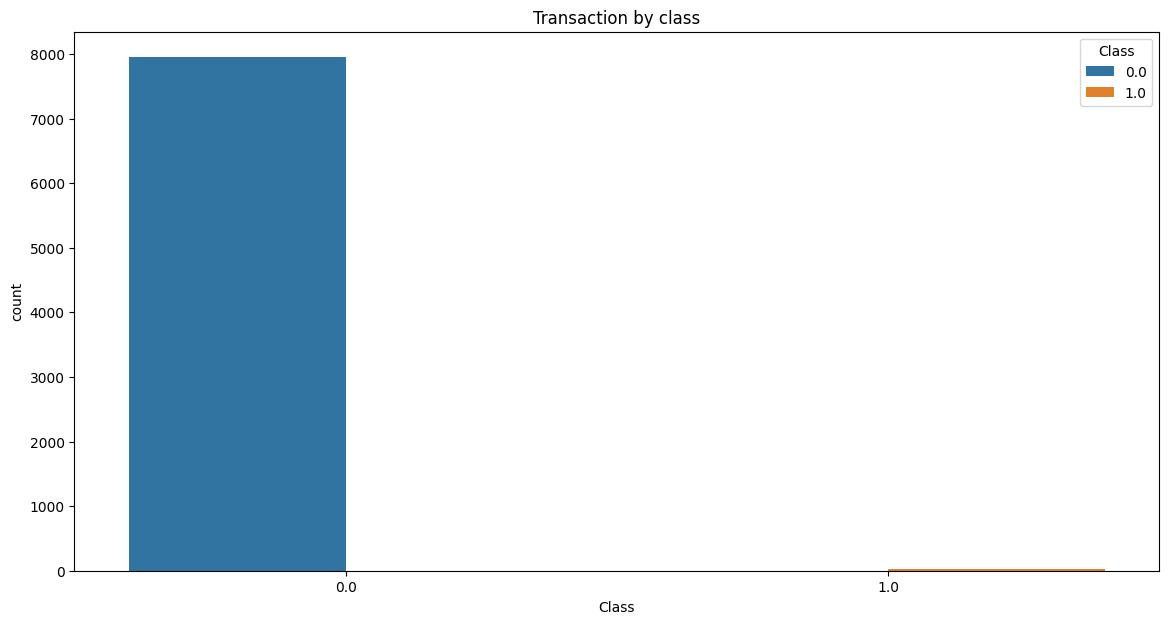

In [28]:
# plot a graph of the class 0 and 1
plt.figure(figsize=(14,7))
fig = sns.countplot(dataset,x='Class',hue='Class')
fig.set(title='Transaction by class')

<Axes: xlabel='Class', ylabel='Amount'>

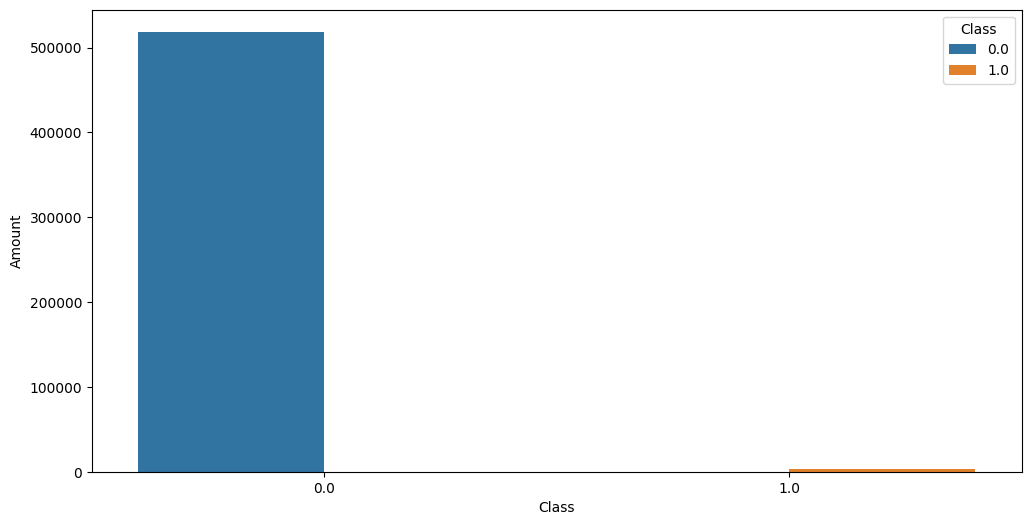

In [29]:
# group the data in Class and plot the amount
plt.figure(figsize=(12,6))
sns.barplot(dataset.groupby('Class', as_index=False).sum(), x='Class',y='Amount',hue='Class')

In [30]:
# fraud data
fraud_dataset = dataset[dataset['Class'] == 1]
fraud_dataset

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
541,406,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,...,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.00,1.0
623,472,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,...,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,529.00,1.0
4920,4462,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,...,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,239.93,1.0
6108,6986,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,...,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,59.00,1.0
6329,7519,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,...,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,1.00,1.0
6331,7526,0.008430,4.137837,-6.240697,6.675732,0.768307,-3.353060,-1.631735,0.154612,-2.795892,...,0.364514,-0.608057,-0.539528,0.128940,1.488481,0.507963,0.735822,0.513574,1.00,1.0
6334,7535,0.026779,4.132464,-6.560600,6.348557,1.329666,-2.513479,-1.689102,0.303253,-3.139409,...,0.370509,-0.576752,-0.669605,-0.759908,1.605056,0.540675,0.737040,0.496699,1.00,1.0
6336,7543,0.329594,3.712889,-5.775935,6.078266,1.667359,-2.420168,-0.812891,0.133080,-2.214311,...,0.156617,-0.652450,-0.551572,-0.716522,1.415717,0.555265,0.530507,0.404474,1.00,1.0
6338,7551,0.316459,3.809076,-5.615159,6.047445,1.554026,-2.651353,-0.746579,0.055586,-2.678679,...,0.208828,-0.511747,-0.583813,-0.219845,1.474753,0.491192,0.518868,0.402528,1.00,1.0
6427,7610,0.725646,2.300894,-5.329976,4.007683,-1.730411,-1.732193,-3.968593,1.063728,-0.486097,...,0.589669,0.109541,0.601045,-0.364700,-1.843078,0.351909,0.594550,0.099372,1.00,1.0


[Text(0.5, 1.0, 'Distribution of time ')]

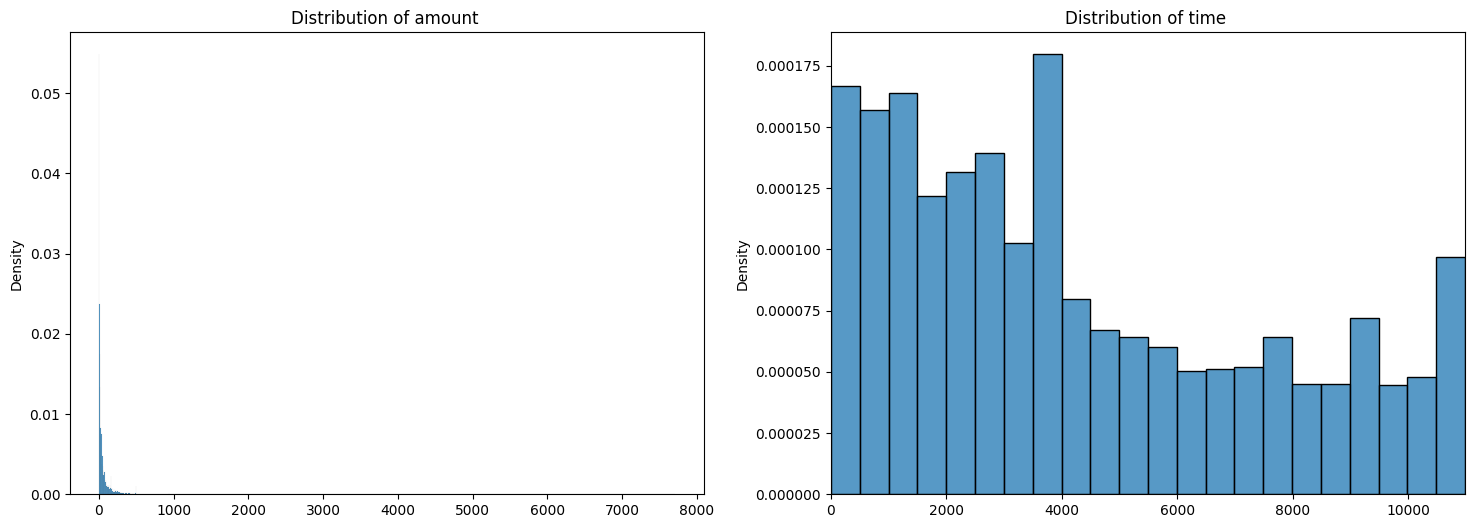

In [31]:
# distribution of amount and time in the dataset

fig, ax = plt.subplots(1,2,figsize=(18,6))

sns.histplot(dataset['Amount'].values, ax=ax[0],stat='density')
# ax[0].set_xlim(dataset['Amount'].min(), dataset['Amount'].max())
ax[0].set(title='Distribution of amount ')
sns.histplot(dataset['Time'].values,ax=ax[1],stat='density')
ax[1].set_xlim(dataset['Time'].min(), dataset['Time'].max())
ax[1].set(title='Distribution of time ')


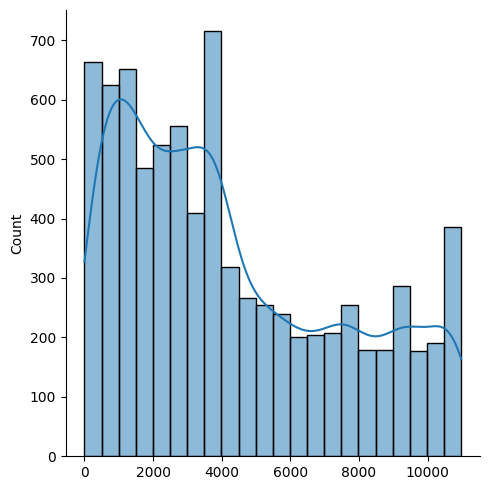

In [32]:
sns.displot(dataset['Time'].values,kde=True)

[Text(0.5, 1.0, 'Fraud Transaction Time vs Amount')]

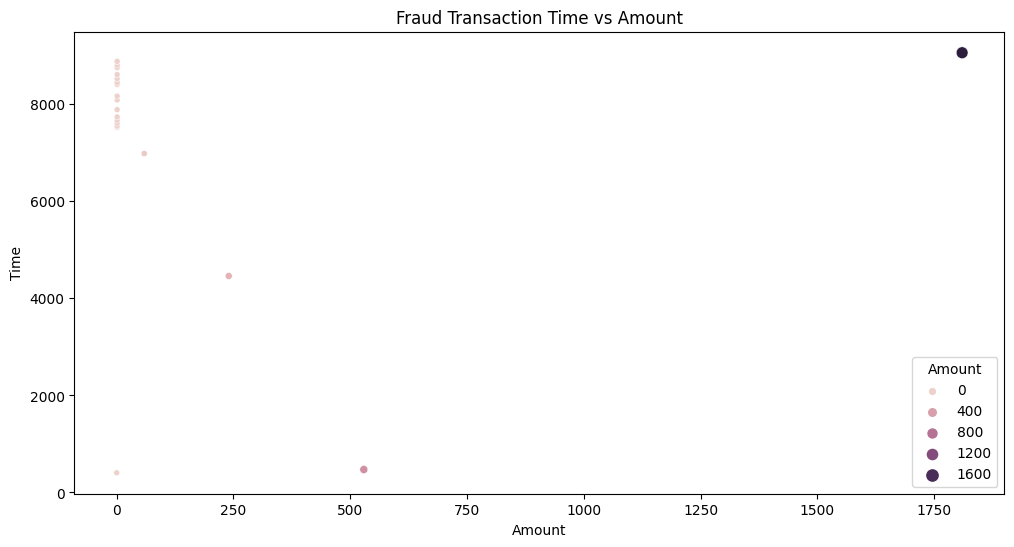

In [33]:
plt.figure(figsize=(12,6))
fig = sns.scatterplot(fraud_dataset, x='Amount',y='Time', hue='Amount', size='Amount')
fig.set(title='Fraud Transaction Time vs Amount')

In [34]:
fraud_dataset[fraud_dataset['Amount'] == 1]

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
6329,7519,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,...,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,1.0,1.0
6331,7526,0.008430,4.137837,-6.240697,6.675732,0.768307,-3.353060,-1.631735,0.154612,-2.795892,...,0.364514,-0.608057,-0.539528,0.128940,1.488481,0.507963,0.735822,0.513574,1.0,1.0
6334,7535,0.026779,4.132464,-6.560600,6.348557,1.329666,-2.513479,-1.689102,0.303253,-3.139409,...,0.370509,-0.576752,-0.669605,-0.759908,1.605056,0.540675,0.737040,0.496699,1.0,1.0
6336,7543,0.329594,3.712889,-5.775935,6.078266,1.667359,-2.420168,-0.812891,0.133080,-2.214311,...,0.156617,-0.652450,-0.551572,-0.716522,1.415717,0.555265,0.530507,0.404474,1.0,1.0
6338,7551,0.316459,3.809076,-5.615159,6.047445,1.554026,-2.651353,-0.746579,0.055586,-2.678679,...,0.208828,-0.511747,-0.583813,-0.219845,1.474753,0.491192,0.518868,0.402528,1.0,1.0
6427,7610,0.725646,2.300894,-5.329976,4.007683,-1.730411,-1.732193,-3.968593,1.063728,-0.486097,...,0.589669,0.109541,0.601045,-0.364700,-1.843078,0.351909,0.594550,0.099372,1.0,1.0
6446,7672,0.702710,2.426433,-5.234513,4.416661,-2.170806,-2.667554,-3.878088,0.911337,-0.166199,...,0.551180,-0.009802,0.721698,0.473246,-1.959304,0.319476,0.600485,0.129305,1.0,1.0
6472,7740,1.023874,2.001485,-4.769752,3.819195,-1.271754,-1.734662,-3.059245,0.889805,0.415382,...,0.343283,-0.054196,0.709654,-0.372216,-2.032068,0.366778,0.395171,0.020206,1.0,1.0
6529,7891,-1.585505,3.261585,-4.137422,2.357096,-1.405043,-1.879437,-3.513687,1.515607,-1.207166,...,0.501543,-0.546869,-0.076584,-0.425550,0.123644,0.321985,0.264028,0.132817,1.0,1.0
6609,8090,-1.783229,3.402794,-3.822742,2.625368,-1.976415,-2.731689,-3.430559,1.413204,-0.776941,...,0.454032,-0.577526,0.045967,0.461700,0.044146,0.305704,0.530981,0.243746,1.0,1.0


In [35]:
# most of tthe fraud transaction are 1
fraud_dataset['Amount'].mode()

0    1.0
Name: Amount, dtype: float64

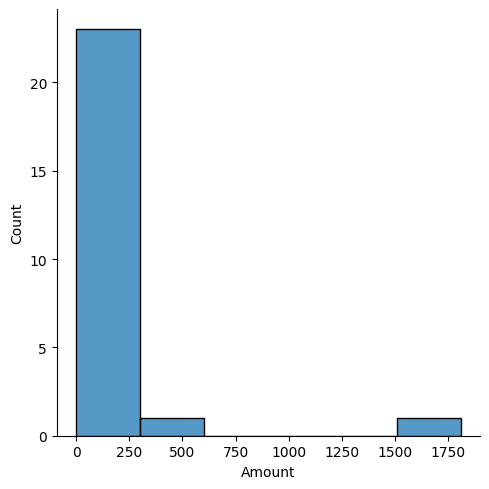

In [36]:
sns.displot(fraud_dataset, x='Amount')

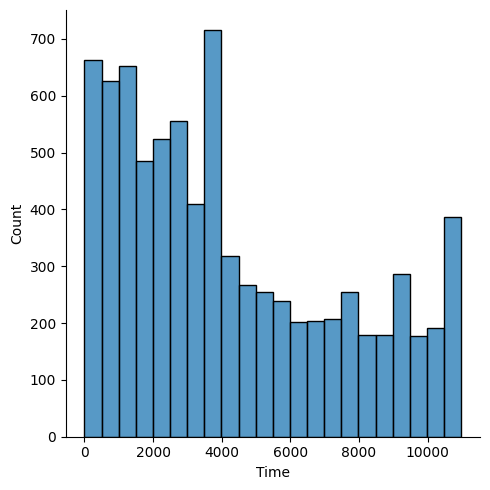

In [37]:
sns.displot(dataset, x='Time')

# Preprocessing

<li>scale the amount and time column
<li>create a balanced dataframe for training your model

Since we are dealing with a highly imbalanced dataset the way to mitigate this would be to use the 1. Undersampling and 2. Oversampling

In [38]:
from sklearn.preprocessing import StandardScaler, RobustScaler
# add a scaled column of time and amount
rbs_scaler = RobustScaler()
dataset['scaled_amount'] = rbs_scaler.fit_transform(dataset['Amount'].values.reshape(-1,1))
dataset['scaled_time'] = rbs_scaler.fit_transform(dataset['Time'].values.reshape(-1,1))

# drop the nonscaled amount and time column
dataset.drop(columns=['Time', 'Amount'], inplace=True)

In [39]:
dataset

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,scaled_amount,scaled_time
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.0,2.657852,-0.708410
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0.0,-0.263658,-0.708410
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0.0,7.212010,-0.708216
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.0,2.138490,-0.708216
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0.0,1.074514,-0.708021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7967,-0.046786,0.030050,2.037794,-0.670130,-0.727283,-0.588537,-0.067966,-0.370767,0.228931,0.211725,...,1.078896,-0.097768,0.375679,-0.500253,-0.159051,-0.018267,-0.061794,0.0,0.458319,1.431732
7968,1.284388,-0.013181,0.646174,0.198985,-0.568675,-0.526121,-0.448235,-0.167709,1.773223,-0.519404,...,-0.030298,-0.081412,-0.123281,0.278808,1.064001,-0.090181,0.000481,0.0,0.000000,1.431732
7969,1.190428,-0.122329,0.954945,0.267101,-0.971026,-0.652279,-0.612992,-0.003909,1.633117,-0.318143,...,0.127027,0.012079,0.534409,0.112179,1.004483,-0.100188,-0.004774,0.0,-0.019884,1.431927
7970,-0.725175,0.298202,1.824761,-2.587170,0.283605,-0.016617,0.153659,0.045084,-0.197611,-0.674963,...,-0.070535,-0.442861,-0.895837,0.624743,-0.510601,-0.031142,0.025564,0.0,-0.059651,1.431927


Undersampling technique of the imbalanced dataset

the technique is biased since it involves bringing down the the nonfraud data to match the fraud data ie information loss

In [40]:
# match the classses to be equal to one another

fraud = dataset[dataset['Class'] == 1]
non_fraud = dataset[dataset['Class'] == 0][:fraud.shape[0]]

In [41]:
print(fraud.shape)
print(non_fraud.shape)

(25, 31)
(25, 31)


In [42]:
# combine the two dataframe and reshafle to reorder the class
combined_df = pd.concat([fraud, non_fraud],ignore_index=True)
combined_df = combined_df.sample(frac=1)

In [43]:
combined_df.loc[:,'V14':][:10]

,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class,scaled_amount,scaled_time
39,-0.734975,0.406796,-0.303058,-0.155869,0.778265,2.221868,-1.582122,1.151663,0.222182,1.020586,0.028317,-0.232746,-0.235557,-0.164778,-0.030154,0.0,0.852016,-0.706072
0,-4.289254,0.389724,-1.140747,-2.830056,-0.016822,0.416956,0.126911,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,1.0,-0.317145,-0.629276
20,-7.417712,-0.436537,-3.652802,-6.293145,-1.243248,0.364810,0.360924,0.667927,-0.516242,-0.012218,0.070614,0.058504,0.304883,0.418012,0.208858,1.0,-0.297261,0.998441
47,1.126870,0.003075,0.424425,-0.454475,-0.098871,-0.816597,-0.307169,0.018702,-0.061972,-0.103855,-0.370415,0.603200,0.108556,-0.040521,-0.011418,0.0,-0.271810,-0.704902
33,0.074355,-0.328783,-0.210077,-0.499768,0.118765,0.570328,0.052736,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,0.0,1.536014,-0.707046
31,0.167372,0.050144,-0.443587,0.002821,-0.611987,-0.045575,-0.219633,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,0.0,-0.217925,-0.707631
38,-0.178485,-0.655564,-0.199925,0.124005,-0.980496,-0.982916,-0.153197,-0.036876,0.074412,-0.071407,0.104744,0.548265,0.104094,0.021491,0.021293,0.0,0.229657,-0.706266
12,-6.608068,-0.481069,-2.602478,-4.835112,-0.553026,0.351949,0.315957,0.501543,-0.546869,-0.076584,-0.425550,0.123644,0.321985,0.264028,0.132817,1.0,-0.297261,0.829646
40,-1.066604,1.106953,1.660114,-0.279265,-0.419994,0.432535,0.263451,0.499625,1.353650,-0.256573,-0.065084,-0.039124,-0.087086,-0.180998,0.129394,0.0,0.000795,-0.706072
29,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0.0,1.074514,-0.708021


In [44]:
combined_df[combined_df['Class'] == 0].loc[:,'V14':]

,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class,scaled_amount,scaled_time
39,-0.734975,0.406796,-0.303058,-0.155869,0.778265,2.221868,-1.582122,1.151663,0.222182,1.020586,0.028317,-0.232746,-0.235557,-0.164778,-0.030154,0.0,0.852016,-0.706072
47,1.126870,0.003075,0.424425,-0.454475,-0.098871,-0.816597,-0.307169,0.018702,-0.061972,-0.103855,-0.370415,0.603200,0.108556,-0.040521,-0.011418,0.0,-0.271810,-0.704902
33,0.074355,-0.328783,-0.210077,-0.499768,0.118765,0.570328,0.052736,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,0.0,1.536014,-0.707046
31,0.167372,0.050144,-0.443587,0.002821,-0.611987,-0.045575,-0.219633,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,0.0,-0.217925,-0.707631
38,-0.178485,-0.655564,-0.199925,0.124005,-0.980496,-0.982916,-0.153197,-0.036876,0.074412,-0.071407,0.104744,0.548265,0.104094,0.021491,0.021293,0.0,0.229657,-0.706266
40,-1.066604,1.106953,1.660114,-0.279265,-0.419994,0.432535,0.263451,0.499625,1.353650,-0.256573,-0.065084,-0.039124,-0.087086,-0.180998,0.129394,0.0,0.000795,-0.706072
29,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0.0,1.074514,-0.708021
30,-0.137134,0.517617,0.401726,-0.058133,0.068653,-0.033194,0.084968,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,0.0,-0.244172,-0.708021
34,-0.443523,0.150219,0.739453,-0.540980,0.476677,0.451773,0.203711,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,0.0,-0.243973,-0.706656
32,-1.323865,0.686133,-0.076127,-1.222127,-0.358222,0.324505,-0.156742,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,0.0,0.494109,-0.707046


In [45]:
combined_df.tail()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,scaled_amount,scaled_time
2,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,-1.525412,...,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,1.0,4.453547,0.161290
13,-1.783229,3.402794,-3.822742,2.625368,-1.976415,-2.731689,-3.430559,1.413204,-0.776941,-6.199882,...,-0.577526,0.045967,0.461700,0.044146,0.305704,0.530981,0.243746,1.0,-0.297261,0.868434
44,1.492936,-1.029346,0.454795,-1.438026,-1.555434,-0.720961,-1.080664,-0.053127,-1.978682,1.638076,...,-0.175074,0.040002,0.295814,0.332931,-0.220385,0.022298,0.007602,0.0,-0.217726,-0.705487
17,0.314597,2.660670,-5.920037,4.522500,-2.315027,-2.278352,-4.684054,1.202270,-0.694696,-5.526278,...,0.064038,0.677842,0.083008,-1.911034,0.322188,0.620867,0.185030,1.0,-0.297261,0.938797
42,-0.436905,0.918966,0.924591,-0.727219,0.915679,-0.127867,0.707642,0.087962,-0.665271,-0.737980,...,-0.672638,-0.156858,-0.888386,-0.342413,-0.049027,0.079692,0.131024,0.0,-0.299448,-0.705877


use correlation matrix to understand the data and a which features affect or determine a transaction to be fraud.


[Text(0.5, 1.0, 'Correlation of the columns in imbalanced dataset')]

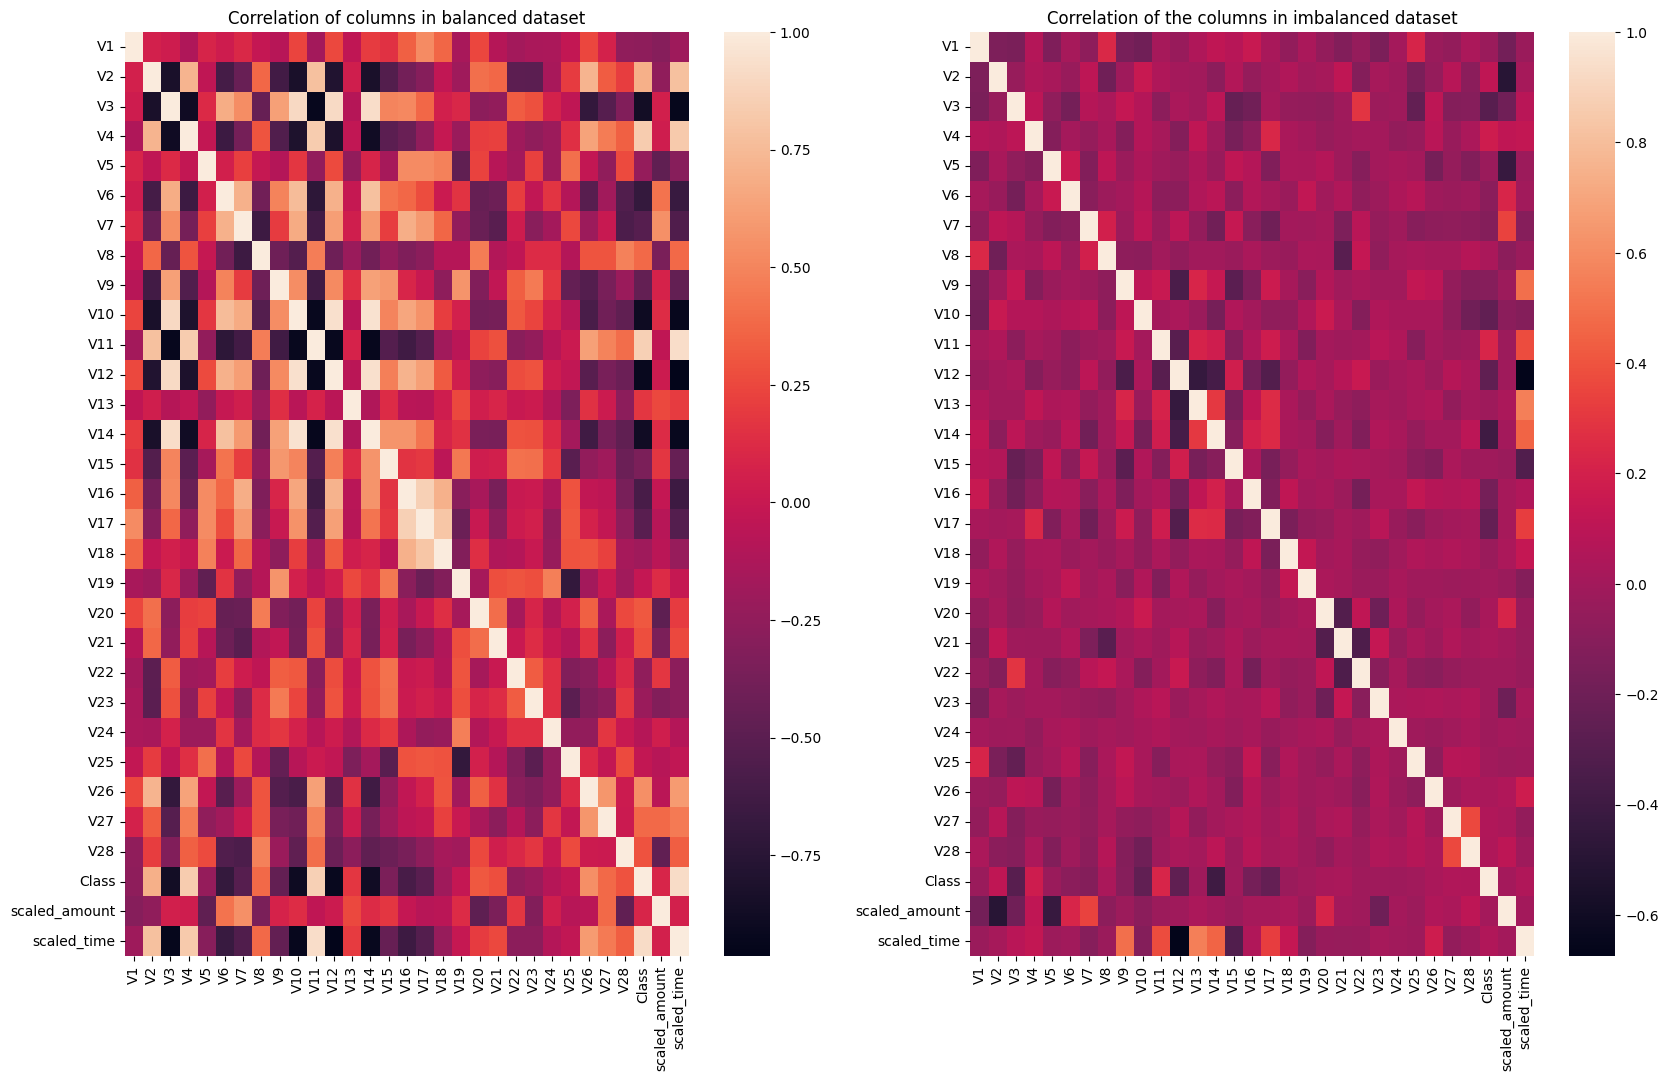

In [52]:
# use the seaborn function heatmap
# use pandas corr() function to compute the pairwise correlation of columns
fig, ax = plt.subplots(1,2, figsize=(20,12))
corr = combined_df.corr()
fig = sns.heatmap(corr,ax=ax[0])
fig.set(title='Correlation of columns in balanced dataset')

# correlation of the imbalanced data
# does not show any correlation between our features

corr =  dataset.corr()
fig = sns.heatmap(corr,ax=ax[1])
fig.set(title='Correlation of the columns in imbalanced dataset')

[Text(0.5, 1.0, 'correlation of columns in balanced dataset')]

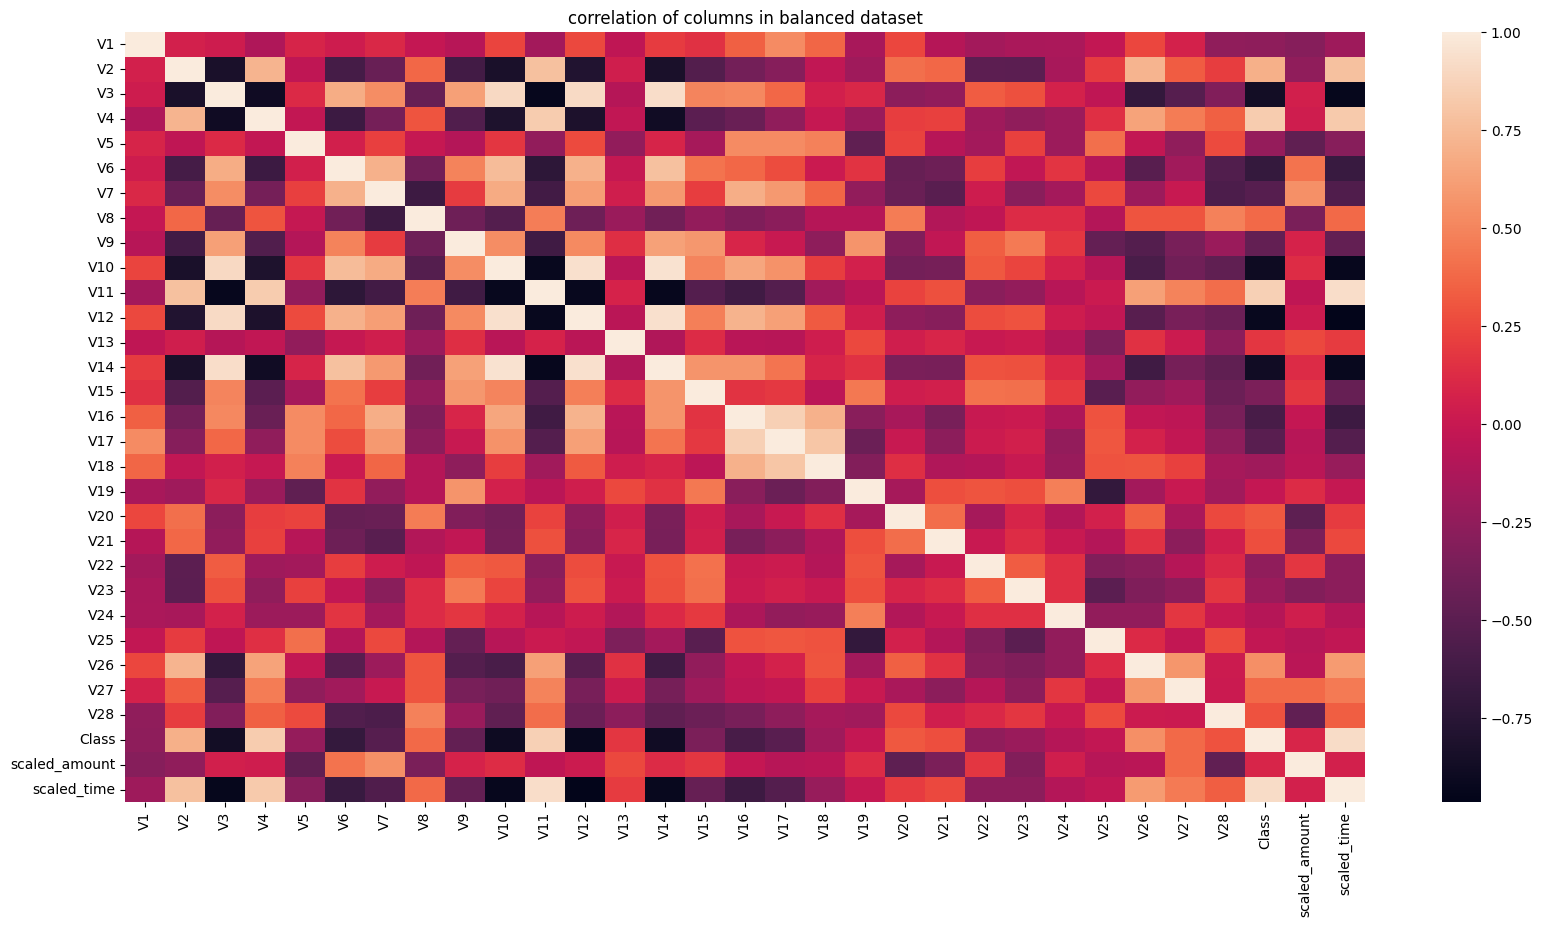

In [53]:
plt.figure(figsize=(20,10))
corr = combined_df.corr()
fig = sns.heatmap(corr)
fig.set(title='correlation of columns in balanced dataset')

In [47]:
corr

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,scaled_amount,scaled_time
V1,1.000000,0.060683,0.028855,-0.119480,0.083708,0.031280,0.103585,-0.014068,-0.079505,0.237409,...,-0.169771,-0.136232,-0.132656,-0.026838,0.244894,0.069624,-0.258557,-0.263891,-0.302350,-0.190499
V2,0.060683,1.000000,-0.833854,0.716133,-0.043114,-0.610810,-0.440948,0.375493,-0.625865,-0.829376,...,-0.490066,-0.499709,-0.148985,0.200278,0.718447,0.326445,0.204361,0.697826,-0.253039,0.779302
V3,0.028855,-0.833854,1.000000,-0.883565,0.114463,0.681741,0.533560,-0.445423,0.620285,0.905287,...,0.328229,0.285756,0.068995,-0.036610,-0.696688,-0.524293,-0.325507,-0.868158,0.048999,-0.935681
V4,-0.119480,0.716133,-0.883565,1.000000,-0.027106,-0.654994,-0.380793,0.299294,-0.543399,-0.807379,...,-0.182382,-0.254427,-0.201225,0.145116,0.635637,0.461172,0.346847,0.834914,0.038931,0.828583
V5,0.083708,-0.043114,0.114463,-0.027106,1.000000,0.054600,0.212802,-0.012731,-0.093069,0.172783,...,-0.170074,0.223196,-0.201599,0.401665,-0.026780,-0.253852,0.258014,-0.232722,-0.480519,-0.291819
V6,0.031280,-0.610810,0.681741,-0.654994,0.054600,1.000000,0.702237,-0.391104,0.486341,0.754517,...,0.209499,-0.031287,0.169248,-0.094577,-0.517476,-0.181765,-0.546308,-0.688536,0.419510,-0.669768
V7,0.103585,-0.440948,0.533560,-0.380793,0.212802,0.702237,1.000000,-0.644094,0.198280,0.676777,...,0.032089,-0.283389,-0.166255,0.254796,-0.201952,-0.003200,-0.566853,-0.525453,0.550049,-0.551862
V8,-0.014068,0.375493,-0.445423,0.299294,-0.012731,-0.391104,-0.644094,1.000000,-0.408015,-0.534086,...,-0.040343,0.118685,0.123594,-0.090268,0.294793,0.295923,0.482011,0.379597,-0.357167,0.381458
V9,-0.079505,-0.625865,0.620285,-0.543399,-0.093069,0.486341,0.198280,-0.408015,1.000000,0.534056,...,0.339570,0.451774,0.171995,-0.457570,-0.530992,-0.365407,-0.207156,-0.465552,0.077250,-0.459855
V10,0.237409,-0.829376,0.905287,-0.807379,0.172783,0.754517,0.676777,-0.534086,0.534056,1.000000,...,0.316541,0.235580,0.065303,-0.075323,-0.584618,-0.403521,-0.476134,-0.888978,0.132673,-0.928075


[Text(0.5, 1.0, 'Correlation V14')]

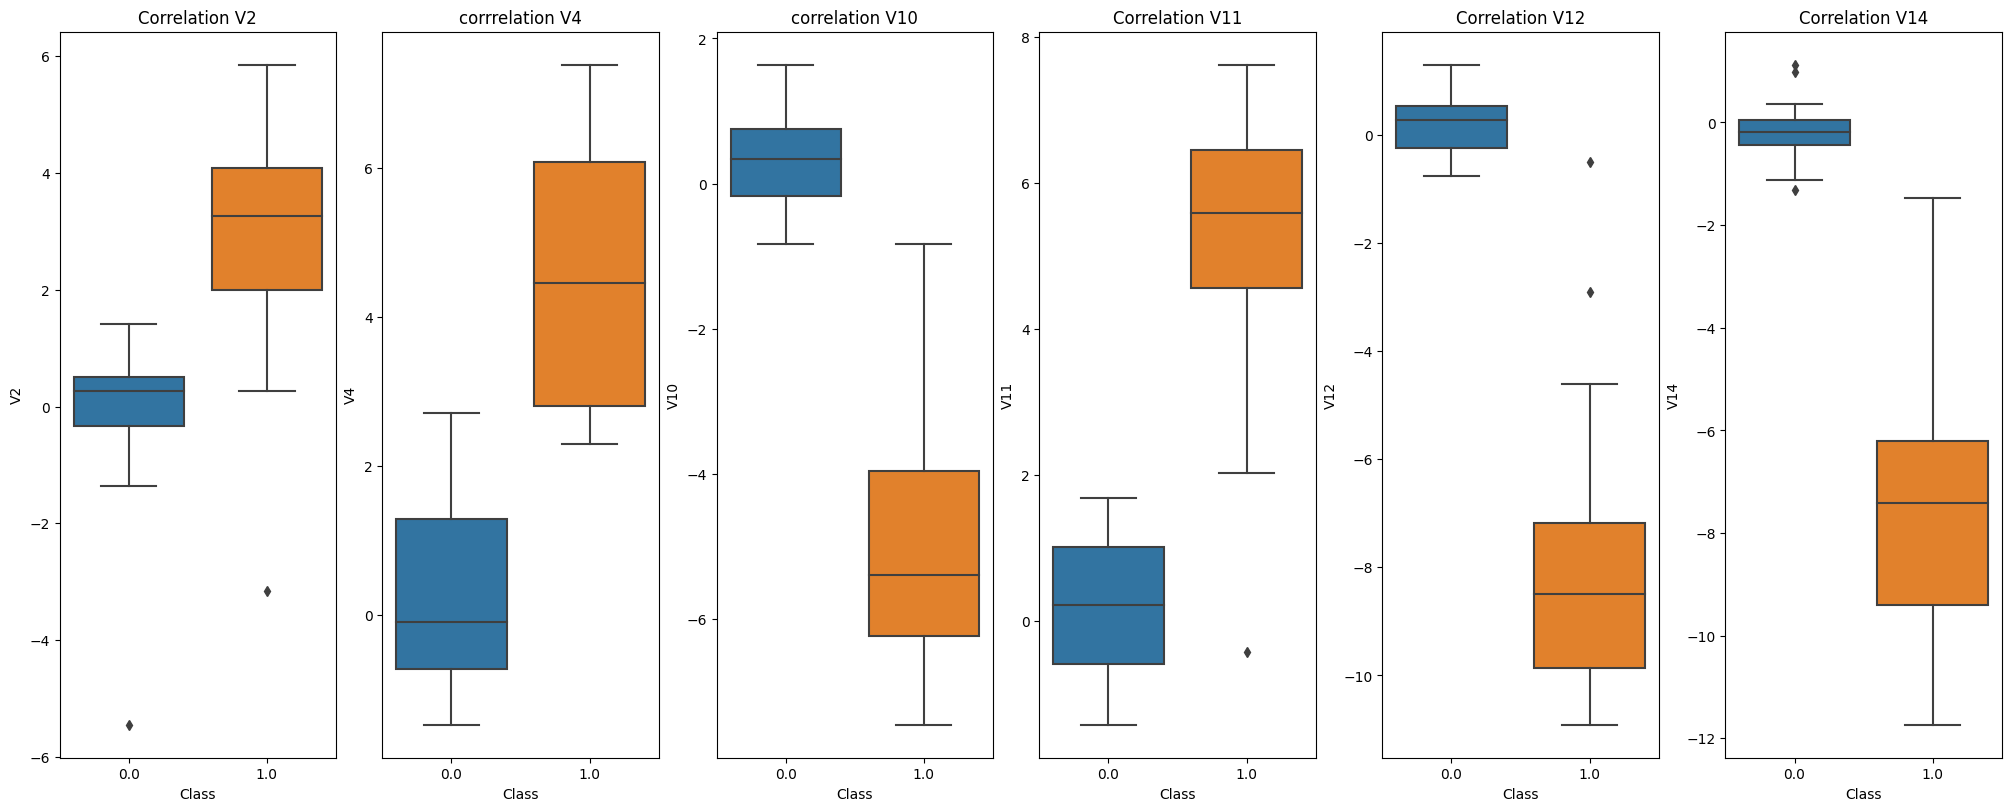

In [49]:
# plot a boxplot to show the correlation of the columns from our correlation matrix
# columns V2, V4, V10, V11, V12, V14, scaled_time
# positively correlated columns; highlighted with light color Feature V2, V4, V11
# negatively correlated columns; highlighted with dark color Feature V3, V10, V12, V14

# correaltion is read by checking the columns name and matching with the Class

fig, ax = plt.subplots(1, 6, figsize=(20,8),layout='constrained')

sns.boxplot(data=combined_df, x='Class',y='V2', ax=ax[0])
ax[0].set(title='Correlation V2')

sns.boxplot(data=combined_df, x='Class', y='V4', ax=ax[1])
ax[1].set(title='corrrelation V4')

sns.boxplot(data=combined_df, x='Class', y='V10', ax=ax[2])
ax[2].set(title='correlation V10')

sns.boxplot(data=combined_df, x='Class', y='V11', ax=ax[3])
ax[3].set(title='Correlation V11')

sns.boxplot(data=combined_df, x='Class', y='V12', ax=ax[4])
ax[4].set(title='Correlation V12')

sns.boxplot(data=combined_df, x='Class', y='V14', ax=ax[5])
ax[5].set(title='Correlation V14')
